In [1]:
!pip install CFEDemands
!pip install ConsumerDemands
!pip install oauth2client
!pip install eep153_tools
!pip install dvc
!pip install gnupg

!pip install -r requirements.txt

import plotly.offline as py
import plotly.graph_objs as go

py.init_notebook_mode(connected=True)

%matplotlib inline

from cfe.demands import marshallian
import numpy as np
import matplotlib.pyplot as plt

  Using cached CFEDemands-0.4.1-py2.py3-none-any.whl (39 kB)
  Using cached ConsumerDemands-0.3.dev0-py2.py3-none-any.whl (12 kB)
  Using cached oauth2client-4.1.3-py2.py3-none-any.whl (98 kB)
  Using cached eep153_tools-0.11-py2.py3-none-any.whl (4.4 kB)
  Using cached dvc-2.10.0-py3-none-any.whl (400 kB)
  Using cached zc.lockfile-2.0-py2.py3-none-any.whl (9.7 kB)
  Using cached dpath-2.0.6-py3-none-any.whl (15 kB)
  Using cached shortuuid-1.0.8-py3-none-any.whl (9.5 kB)
  Using cached ply-3.11-py2.py3-none-any.whl (49 kB)
  Using cached python_benedict-0.25.0-py3-none-any.whl (40 kB)
  Using cached dictdiffer-0.9.0-py2.py3-none-any.whl (16 kB)
  Using cached flatten_dict-0.4.2-py2.py3-none-any.whl (9.7 kB)
Processing /home/jovyan/.cache/pip/wheels/2e/5d/81/d6e52fec193180ffffef19b185ecf1d0a85d418808c20c09c9/pygtrie-2.4.2-py3-none-any.whl
  Using cached voluptuous-0.13.0-py3-none-any.whl (29 kB)
     |████████████████████████████████| 78 kB 2.4 MB/s eta 0:00:011
  Using cached grandal

Missing dependencies for OracleDemands.


Deliverable A - Estimating demand system

In [2]:
InputFiles = {'Expenditures':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','Expenditures'),
              'malawi_consumption':('1c2rXKtnVawQ802xAh4qm5HDK9MiFTFlGZJjcgTooRVo','malawi_consumption'),
              'HH Characteristics':('1-rP6IC2wm91nH94xApeLCXS7dslqlsTns9si57Hs1c0','HH Characteristics'),
              'Sheet1':('1fB07bbO0j6V74X8IxqvL3VhqWcs1qV6r','Sheet1')}


In [3]:
from eep153_tools.sheets import read_sheets
import numpy as np
import pandas as pd

def get_clean_sheet(key,sheet=None):

    dfs = read_sheets(key)

    if sheet is not None:
        df = dfs[sheet]
    else:
        df = dfs.values()[0]
        
    df.columns = [c.strip() for c in df.columns.tolist()]

    df = df.loc[:,~df.columns.duplicated(keep='first')]   

    df = df.drop([col for col in df.columns if col.startswith('Unnamed')], axis=1)

    df = df.loc[~df.index.duplicated(), :]

    return df

In [4]:
# Get expenditures...
x = get_clean_sheet(InputFiles['Expenditures'][0],
                    sheet=InputFiles['Expenditures'][1])

if 'm' not in x.columns:
    x['m'] = 1

x = x.set_index(['j','t','m'])
x.columns.name = 'i'

x = x.apply(lambda x: pd.to_numeric(x,errors='coerce'))
x = x.replace(0,np.nan)

x

Key available for students@eep153.iam.gserviceaccount.com.


,,i,Apple,Avocado,Banana,"Bean, brown","Bean, white",Beef,Biscuits,Bottled water,Bottled/ canned beer,Bread,...,Tomato,Tomato sauce (bottle),Traditional beer (masase),Wheat flour,White sweet potato,"Wild fruit (masau, mlambe, etc.)",Wine or commercial liquor,"Yeast, baking powder, bicarbonate of soda",Yoghurt,nan
j,t,m,,,,,,,,,,,,,,,,,,,,,
10101002025,2004,1,NaN,10.0,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
10101002051,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10101002072,2004,1,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
10101002079,2004,1,NaN,16.0,60.0,NaN,NaN,60.0,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
10101002095,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,NaN,NaN,NaN,160.0,NaN,NaN,NaN,NaN,NaN,260.0,...,150.0,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
315556140365,2010,1,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN
315556140388,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,NaN,NaN


In [5]:
# Get HH characteristics...
z = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z.columns:
    z['m'] = 1

z = z.set_index(['j','t','m'])
z.columns.name = 'k'

z = z.apply(lambda x: pd.to_numeric(x,errors='coerce'))

z

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
10101002025,2004,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0
10101002051,2004,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
10101002072,2004,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0
10101002079,2004,1,0,1,0,0,0,1,0,2,1,0,0,0,1,0
10101002095,2004,1,0,0,2,0,1,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
315556140365,2010,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
315556140388,2010,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [6]:
q = get_clean_sheet(InputFiles['malawi_consumption'][0],
                    sheet=InputFiles['malawi_consumption'][1])

if 'm' not in q.columns:
    q['m'] = 1

q = q.set_index(['j','t','m','u'])
q.columns.name = 'i'

q = q.apply(lambda x: pd.to_numeric(x,errors='coerce'))
q = q.replace(0,np.nan)

q

Key available for students@eep153.iam.gserviceaccount.com.


i                              Apple  Avocado  Banana  Bean, brown  \
j           t    m u                                                 
10101002025 2004 1 Gram          NaN      NaN     NaN          NaN   
                   Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      2.0     NaN          NaN   
10101002051 2004 1 Gram          NaN      NaN     NaN          NaN   
...                              ...      ...     ...          ...   
31202086364 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   
31202086374 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   

i                              Bean, white  Beef  Biscuits  Bottled water  \
j           t    m u                                                        
10101002025 2004 1 Gram                NaN   NaN       NaN            NaN   
                   Kg                  NaN   2.0       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
10101002051 2004 1 Gram                NaN   NaN       NaN            NaN   
...                                    ...   ...       ...            ...   
31202086364 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
31202086374 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   

i                              Bottled/ canned beer  Bread  ...  Tomato  \
j           t    m u                                        ...           
10101002025 2004 1 Gram                         NaN    NaN  ...     NaN   
                   Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     5.0   
10101002051 2004 1 Gram                         NaN    NaN  ...     NaN   
...                                             ...    ...  ...     ...   
31202086364 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...    15.0   
31202086374 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     7.0   

i                              Tomato sauce (bottle)  \
j           t    m u                                   
10101002025 2004 1 Gram                          NaN   
                   Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
10101002051 2004 1 Gram                          NaN   
...                                              ...   
31202086364 2004 1 Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
31202086374 2004 1 Kg                            NaN   
                   Piece                         NaN   

i                              Traditional beer (masase)  Wheat flour  \
j           t    m u                                                    
10101002025 2004 1 Gram                              NaN          NaN   
                   Kg                                NaN          NaN   
                   Millilitre                        NaN          NaN   
                 

In [18]:
import sys
import cfe

y = np.log(x)
y
result = cfe.Result(y=y,z=z)

In [19]:
result

<xarray.Result>
Dimensions:           (k: 14, j: 23551, t: 2, m: 1, i: 49)
Coordinates:
  * j                 (j) int64 10101002025 10101002051 ... 315556140434
  * t                 (t) int64 2004 2010
  * m                 (m) int64 1
  * i                 (i) <U41 'Avocado' ... 'Yeast, baking powder, bicarbona...
  * k                 (k) <U7 'M 0-3' 'M 4-8' 'M 9-13' ... 'F 31-50' 'F 51+'
Data variables: (12/20)
    alpha             object None
    beta              object None
    delta             object None
    prices            object None
    characteristics   (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
    loglambdas        object None
    ...                ...
    se_beta           object None
    se_alpha          object None
    se_a              object None
    y                 (i, j, t, m) float64 nan nan nan nan ... nan nan nan nan
    logp              object None
    z                 (k, j, t, m) float64 1.0 nan 0.0 nan ... nan 0.0 nan 0.0
Attributes:
    firstround:            2004
    min_proportion_items:  0.125
    min_xproducts:         30
    all_tm:                True
    common_alpha:          True
    useless_expenditures:  False
    stderr_tol:            0.01
    indices:               Indices(j='j', t='t', m='m', i='i', k='k')
    iterate:               False
    verbose:               False

In [20]:
result.get_reduced_form()

In [21]:
result.delta.to_dataframe().unstack('k')

delta                      \
k                                             M 0-3     M 4-8    M 9-13   
i                                                                         
Avocado                                   -0.027469  0.036233 -0.003036   
Banana                                    -0.094776 -0.079738  0.054585   
Bean, brown                                0.033756  0.058986  0.062206   
Bean, white                                0.088998  0.050373  0.097664   
Beef                                      -0.098905  0.033595  0.060964   
Biscuits                                  -0.224607 -0.173919  0.092814   
Bread                                     -0.065294 -0.004541  0.059943   
Buns, scones                               0.045246  0.120182  0.113218   
Cabbage                                    0.014356  0.015227  0.079775   
Cassava tubers                             0.027358  0.048204  0.101075   
Chicken                                   -0.109181  0.007102  0.016048   
Chinese cabbage                            0.103933 -0.009215  0.075137   
Chips (vendor)                            -0.054027 -0.069796  0.035470   
Citrus, naartje, orange, etc.              0.005910 -0.110700  0.039455   
Cooking oil                               -0.099341 -0.079330  0.009946   
Dried fish                                -0.008991  0.006457  0.023662   
Eggs                                      -0.056172 -0.002189  0.055644   
Freezes (flavoured ice)                    0.126634  0.058527 -0.054907   
Fresh fish                                -0.121088 -0.049693 -0.031192   
Fresh milk                                -0.073576 -0.040439  0.057022   
Goat                                      -0.007920 -0.012172  0.109584   
Green maize                               -0.058496  0.010045  0.122148   
Groundnut                                 -0.028979 -0.001292  0.052138   
Groundnut flour                           -0.048324 -0.047073 -0.018861   
Irish potato                              -0.091835 -0.061779  0.038687   
Maize - boiled or roasted                 -0.041780  0.024351  0.097697   
Maize ufa mgaiwa (normal flour)            0.064310  0.112515  0.041167   
Maize ufa refined (fine flour)             0.018110  0.063524  0.142145   
Mandazi, doughnut (vendor)                 0.046214  0.009386  0.062543   
Meat (vendor)                             -0.004185  0.053168 -0.023871   
Meat eaten at restaurant                  -0.280654 -0.132582  0.000111   
Nkwani                                     0.031160  0.033066  0.047762   
Okra / Therere                             0.014872 -0.055624  0.051188   
Onion                                     -0.091255 -0.071492  0.024967   
Orange sweet potato                        0.161137  0.019499  0.062452   
Pork                                      -0.011009 -0.006449  0.131056   
Powdered milk                             -0.256034 -0.050838 -0.001133   
Rice                                      -0.039716 -0.001724  0.017940   
Salt                                       0.003369  0.010418  0.082138   
Samosa (vendor)                           -0.247947  0.056758 -0.128120   
Soft drinks (coca cola, fanta)            -0.100256 -0.027790 -0.008544   
Sugar                                      0.064521  0.044586  0.073426   
Sugar cane                                 0.081139  0.010243  0.090556   
Sweets, candy, chocolates                 -0.290199 -0.086628 -0.118559   
Tanaposi rape                              0.042259  0.039258  0.050717   
Tea                                       -0.084797 -0.006682  0.072521   
Tomato                                    -0.100691 -0.075390  0.004835   
White sweet potato                         0.046810  0.057825  0.181314   
Yeast, baking powder, bicarbonate of soda -0.110725 -0.072785  0.022043   

                                                                         \
k                                           M 14-18   M 19-30   M 31-5

In [22]:
result.a.to_dataframe().unstack('i')

a                                                        \
i        Avocado    Banana Bean, brown Bean, white      Beef  Biscuits   
t    m                                                                   
2004 1  2.732589  2.553386    3.563498    3.480738  4.906085  2.736930   
2010 1  3.709544  3.873656    4.573519    4.511708  5.846323  3.824394   

                                                        ...                  \
i          Bread Buns, scones   Cabbage Cassava tubers  ... Samosa (vendor)   
t    m                                                  ...                   
2004 1  4.330692     3.272087  2.821576       2.735024  ...        2.692764   
2010 1  5.089198     4.234627  3.772250       3.782887  ...        3.680945   

                                                            \
i      Soft drinks (coca cola, fanta)     Sugar Sugar cane   
t    m                                                       
2004 1                       4.026075  3.647259   2.475238   
2010 1                       4.758748  4.549718   3.376966   

                                                                    \
i      Sweets, candy, chocolates Tanaposi rape       Tea    Tomato   
t    m                                                               
2004 1                  1.879936      2.486638  2.237929  3.439653   
2010 1                  3.224241      3.538246  2.994732  4.361938   

                                                                     
i      White sweet potato Yeast, baking powder, bicarbonate of soda  
t    m                                                               
2004 1           2.985221                                  1.016818  
2010 1           4.048783                                  2.198148  

[2 rows x 49 columns]

In [23]:
result.get_beta(as_df=True)

i
Avocado                                      0.383249
Banana                                       0.598940
Bean, brown                                  0.192255
Bean, white                                  0.232248
Beef                                         0.365007
Biscuits                                     0.816535
Bread                                        0.360046
Buns, scones                                 0.303703
Cabbage                                      0.259849
Cassava tubers                               0.286150
Chicken                                      0.276638
Chinese cabbage                              0.313419
Chips (vendor)                               0.352606
Citrus, naartje, orange, etc.                0.648388
Cooking oil                                  0.591433
Dried fish                                   0.369809
Eggs                                         0.357952
Freezes (flavoured ice)                      0.561462
Fresh fish                

In [24]:
result.get_alpha(as_df = True)

i
Avocado                                      2.732589
Banana                                       2.553386
Bean, brown                                  3.563498
Bean, white                                  3.480738
Beef                                         4.906085
Biscuits                                     2.736930
Bread                                        4.330692
Buns, scones                                 3.272087
Cabbage                                      2.821576
Cassava tubers                               2.735024
Chicken                                      5.382624
Chinese cabbage                              2.325482
Chips (vendor)                               3.575587
Citrus, naartje, orange, etc.                2.329459
Cooking oil                                  3.783886
Dried fish                                   3.677535
Eggs                                         3.874567
Freezes (flavoured ice)                      1.836321
Fresh fish                

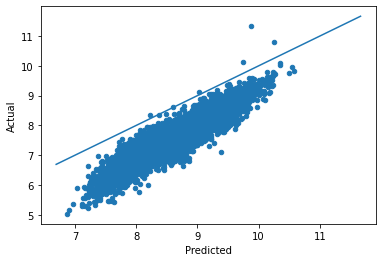

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])

Deliverable B - Engel Curve

In [7]:
from cfe import demands

# Cobb-Douglas utility is a special case of a more general class
def cobb_douglas_utility(alpha):
    """
    Define Cobb-Douglas utility function.
    """
    n = len(alpha)
    U = lambda c: demands.utility(c,alpha,[1]*n,[0]*n)

    return U

# Two good case:
alpha=[0.5,0.9] # Preference parameters

U = cobb_douglas_utility(alpha)

parms = {'alpha':[0.3,0.7], # Preference parameters
         'beta':[1,1], # Curvature parameters
         'phi':0}

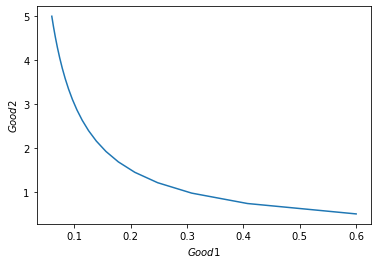

In [8]:
# Demand for c_1 as a function of own price
D1 = lambda prices1,prices2=1,x=1: marshallian.demands(x,(prices1,prices2),parms)[0]

Prices = np.linspace(.5,5,20)

plt.plot([D1(prices1) for prices1 in Prices],Prices)
plt.xlabel('$Good 1$')
plt.ylabel('$Good 2$')

plt.show()

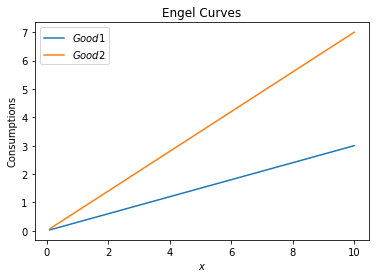

In [9]:
from cfe.demands import marshallian
import numpy as np
import matplotlib.pyplot as plt

# Demand for c_1 as a function of own price
E1 = lambda x,price1=1,price2=1: marshallian.demands(x,(price1,price2),parms)

X = np.linspace(.1,10,20)

plt.plot(X,[E1(x)[0] for x in X],X,[E1(x)[1] for x in X])
plt.xlabel('$x$')
plt.ylabel('Consumptions')
plt.legend(('$Good1$','$Good2$'))
plt.title('Engel Curves')

plt.show()

Deliverable C - counterfactual experiments (doubling expenditures)

In [10]:
x2 = x.iloc[:,:]*2
x2

,,i,Apple,Avocado,Banana,"Bean, brown","Bean, white",Beef,Biscuits,Bottled water,Bottled/ canned beer,Bread,...,Tomato,Tomato sauce (bottle),Traditional beer (masase),Wheat flour,White sweet potato,"Wild fruit (masau, mlambe, etc.)",Wine or commercial liquor,"Yeast, baking powder, bicarbonate of soda",Yoghurt,nan
j,t,m,,,,,,,,,,,,,,,,,,,,,
10101002025,2004,1,NaN,20.0,NaN,NaN,NaN,320.0,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
10101002051,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10101002072,2004,1,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
10101002079,2004,1,NaN,32.0,120.0,NaN,NaN,120.0,NaN,NaN,NaN,NaN,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
10101002095,2004,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,NaN,NaN,NaN,320.0,NaN,NaN,NaN,NaN,NaN,520.0,...,300.0,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN
315556140365,2010,1,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,160.0,NaN,NaN,NaN,200.0,NaN,NaN,NaN,NaN,NaN
315556140388,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,NaN,NaN


In [11]:
# Get HH characteristics...
z2 = get_clean_sheet(InputFiles['HH Characteristics'][0],
                    sheet=InputFiles['HH Characteristics'][1])

if 'm' not in z2.columns:
    z2['m'] = 1

z2 = z2.set_index(['j','t','m'])
z2.columns.name = 'k'

z2 = z2.apply(lambda x2: pd.to_numeric(x2,errors='coerce'))

z2

Key available for students@eep153.iam.gserviceaccount.com.


,,k,M 0-3,M 4-8,M 9-13,M 14-18,M 19-30,M 31-50,M 51+,F 0-3,F 4-8,F 9-13,F 14-18,F 19-30,F 31-50,F 51+
j,t,m,,,,,,,,,,,,,,
10101002025,2004,1,1,0,1,1,0,1,0,1,1,0,0,0,1,0
10101002051,2004,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0
10101002072,2004,1,1,1,0,1,0,1,0,1,0,0,0,1,0,0
10101002079,2004,1,0,1,0,0,0,1,0,2,1,0,0,0,1,0
10101002095,2004,1,0,0,2,0,1,0,0,0,2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315556140342,2010,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0
315556140365,2010,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0
315556140388,2010,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0


In [12]:
q2 = get_clean_sheet(InputFiles['malawi_consumption'][0],
                    sheet=InputFiles['malawi_consumption'][1])

if 'm' not in q2.columns:
    q2['m'] = 1

q2 = q2.set_index(['j','t','m','u'])
q2.columns.name = 'i'

q2 = q2.apply(lambda x2: pd.to_numeric(x2,errors='coerce'))
q2 = q2.replace(0,np.nan)

q2

Key available for students@eep153.iam.gserviceaccount.com.


i                              Apple  Avocado  Banana  Bean, brown  \
j           t    m u                                                 
10101002025 2004 1 Gram          NaN      NaN     NaN          NaN   
                   Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      2.0     NaN          NaN   
10101002051 2004 1 Gram          NaN      NaN     NaN          NaN   
...                              ...      ...     ...          ...   
31202086364 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Millilitre    NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   
31202086374 2004 1 Kg            NaN      NaN     NaN          NaN   
                   Piece         NaN      NaN     NaN          NaN   

i                              Bean, white  Beef  Biscuits  Bottled water  \
j           t    m u                                                        
10101002025 2004 1 Gram                NaN   NaN       NaN            NaN   
                   Kg                  NaN   2.0       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
10101002051 2004 1 Gram                NaN   NaN       NaN            NaN   
...                                    ...   ...       ...            ...   
31202086364 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Millilitre          NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   
31202086374 2004 1 Kg                  NaN   NaN       NaN            NaN   
                   Piece               NaN   NaN       NaN            NaN   

i                              Bottled/ canned beer  Bread  ...  Tomato  \
j           t    m u                                        ...           
10101002025 2004 1 Gram                         NaN    NaN  ...     NaN   
                   Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     5.0   
10101002051 2004 1 Gram                         NaN    NaN  ...     NaN   
...                                             ...    ...  ...     ...   
31202086364 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Millilitre                   NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...    15.0   
31202086374 2004 1 Kg                           NaN    NaN  ...     NaN   
                   Piece                        NaN    NaN  ...     7.0   

i                              Tomato sauce (bottle)  \
j           t    m u                                   
10101002025 2004 1 Gram                          NaN   
                   Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
10101002051 2004 1 Gram                          NaN   
...                                              ...   
31202086364 2004 1 Kg                            NaN   
                   Millilitre                    NaN   
                   Piece                         NaN   
31202086374 2004 1 Kg                            NaN   
                   Piece                         NaN   

i                              Traditional beer (masase)  Wheat flour  \
j           t    m u                                                    
10101002025 2004 1 Gram                              NaN          NaN   
                   Kg                                NaN          NaN   
                   Millilitre                        NaN          NaN   
                 

In [13]:
import sys
import cfe

y2 = np.log(x2)
y2
result2 = cfe.Result(y=y2,z=z2)

In [14]:
result2.get_reduced_form()

In [15]:
result2.delta.to_dataframe().unstack('k')

delta                      \
k                                             M 0-3     M 4-8    M 9-13   
i                                                                         
Avocado                                   -0.027469  0.036233 -0.003036   
Banana                                    -0.094776 -0.079738  0.054585   
Bean, brown                                0.033756  0.058986  0.062206   
Bean, white                                0.088998  0.050373  0.097664   
Beef                                      -0.098905  0.033595  0.060964   
Biscuits                                  -0.224607 -0.173919  0.092814   
Bread                                     -0.065294 -0.004541  0.059943   
Buns, scones                               0.045246  0.120182  0.113218   
Cabbage                                    0.014356  0.015227  0.079775   
Cassava tubers                             0.027358  0.048204  0.101075   
Chicken                                   -0.109181  0.007102  0.016048   
Chinese cabbage                            0.103933 -0.009215  0.075137   
Chips (vendor)                            -0.054027 -0.069796  0.035470   
Citrus, naartje, orange, etc.              0.005910 -0.110700  0.039455   
Cooking oil                               -0.099341 -0.079330  0.009946   
Dried fish                                -0.008991  0.006457  0.023662   
Eggs                                      -0.056172 -0.002189  0.055644   
Freezes (flavoured ice)                    0.126634  0.058527 -0.054907   
Fresh fish                                -0.121088 -0.049693 -0.031192   
Fresh milk                                -0.073576 -0.040439  0.057022   
Goat                                      -0.007920 -0.012172  0.109584   
Green maize                               -0.058496  0.010045  0.122148   
Groundnut                                 -0.028979 -0.001292  0.052138   
Groundnut flour                           -0.048324 -0.047073 -0.018861   
Irish potato                              -0.091835 -0.061779  0.038687   
Maize - boiled or roasted                 -0.041780  0.024351  0.097697   
Maize ufa mgaiwa (normal flour)            0.064310  0.112515  0.041167   
Maize ufa refined (fine flour)             0.018110  0.063524  0.142145   
Mandazi, doughnut (vendor)                 0.046214  0.009386  0.062543   
Meat (vendor)                             -0.004185  0.053168 -0.023871   
Meat eaten at restaurant                  -0.280654 -0.132582  0.000111   
Nkwani                                     0.031160  0.033066  0.047762   
Okra / Therere                             0.014872 -0.055624  0.051188   
Onion                                     -0.091255 -0.071492  0.024967   
Orange sweet potato                        0.161137  0.019499  0.062452   
Pork                                      -0.011009 -0.006449  0.131056   
Powdered milk                             -0.256034 -0.050838 -0.001133   
Rice                                      -0.039716 -0.001724  0.017940   
Salt                                       0.003369  0.010418  0.082138   
Samosa (vendor)                           -0.247947  0.056758 -0.128120   
Soft drinks (coca cola, fanta)            -0.100256 -0.027790 -0.008544   
Sugar                                      0.064521  0.044586  0.073426   
Sugar cane                                 0.081139  0.010243  0.090556   
Sweets, candy, chocolates                 -0.290199 -0.086628 -0.118559   
Tanaposi rape                              0.042259  0.039258  0.050717   
Tea                                       -0.084797 -0.006682  0.072521   
Tomato                                    -0.100691 -0.075390  0.004835   
White sweet potato                         0.046810  0.057825  0.181314   
Yeast, baking powder, bicarbonate of soda -0.110725 -0.072785  0.022043   

                                                                         \
k                                           M 14-18   M 19-30   M 31-5

In [16]:
result2.a.to_dataframe().unstack('i')

a                                                        \
i        Avocado    Banana Bean, brown Bean, white      Beef  Biscuits   
t    m                                                                   
2004 1  3.425736  3.246533    4.256645    4.173885  5.599232  3.430078   
2010 1  4.402691  4.566804    5.266667    5.204855  6.539470  4.517541   

                                                        ...                  \
i          Bread Buns, scones   Cabbage Cassava tubers  ... Samosa (vendor)   
t    m                                                  ...                   
2004 1  5.023839     3.965235  3.514723       3.428171  ...        3.385911   
2010 1  5.782345     4.927774  4.465397       4.476034  ...        4.374092   

                                                            \
i      Soft drinks (coca cola, fanta)     Sugar Sugar cane   
t    m                                                       
2004 1                       4.719222  4.340406   3.168386   
2010 1                       5.451895  5.242865   4.070113   

                                                                    \
i      Sweets, candy, chocolates Tanaposi rape       Tea    Tomato   
t    m                                                               
2004 1                  2.573083      3.179785  2.931077  4.132800   
2010 1                  3.917388      4.231393  3.687879  5.055085   

                                                                     
i      White sweet potato Yeast, baking powder, bicarbonate of soda  
t    m                                                               
2004 1           3.678368                                  1.709965  
2010 1           4.741930                                  2.891295  

[2 rows x 49 columns]

In [17]:
result2.get_beta(as_df=True)

i
Avocado                                      0.383249
Banana                                       0.598940
Bean, brown                                  0.192255
Bean, white                                  0.232248
Beef                                         0.365007
Biscuits                                     0.816535
Bread                                        0.360046
Buns, scones                                 0.303703
Cabbage                                      0.259849
Cassava tubers                               0.286150
Chicken                                      0.276638
Chinese cabbage                              0.313419
Chips (vendor)                               0.352606
Citrus, naartje, orange, etc.                0.648388
Cooking oil                                  0.591433
Dried fish                                   0.369809
Eggs                                         0.357952
Freezes (flavoured ice)                      0.561462
Fresh fish                

In [ ]:
result2.get_alpha(as_df = True)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

xbar = np.exp(result2.y).sum(['m','i']).to_dataframe('xbar').replace(0,np.nan).squeeze()
xhat = result2.get_predicted_expenditures().sum(['m','i']).to_dataframe('xhat').replace(0,np.nan).squeeze()

# Make dataframe of actual & predicted
df = pd.DataFrame({'Actual':np.log(xbar),'Predicted':np.log(xhat)})

df.plot.scatter(x='Predicted',y='Actual')

# Add 45 degree line
v = plt.axis()
vmin = np.max([v[0],v[2]])
vmax = np.max([v[1],v[3]])
plt.plot([vmin,vmax],[vmin,vmax])